# Capstone project #

## Finding the best place for restaurant in Toronto ##

### Part 1. Scrapping data and creating dataframe

#### Importing libraries

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Folium installed
Libraries imported.


#### Importing data from wiki page

In [2]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
#specifying target url
url="https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
html=urlopen(url)

In [3]:
#importing data from web page to dataframe
df=pd.read_html(url, header=0)[0]
df.head()

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


#### Deleting rows with "Not assigned" Borough

In [4]:
# deleting rows with "Not assigned" Borough
df = df[df.Borough != 'Not assigned']
df = df.reset_index(drop=True)
df.head(10)

,Postcode,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Harbourfront
3,M5A,Downtown Toronto,Regent Park
4,M6A,North York,Lawrence Heights
5,M6A,North York,Lawrence Manor
6,M7A,Queen's Park,Not assigned
7,M9A,Etobicoke,Islington Avenue
8,M1B,Scarborough,Rouge
9,M1B,Scarborough,Malvern


#### Replacing data in column "Neigbourhood" by values from column "Borough", when Neighborhood = 'Not assigned'

In [5]:
# replacing data in column "Neigbourhood" by values from column "Borough", when Neighborhood = 'Not assigned'
for i in range(len(df)) : 
     if df.iloc[i, 2] == 'Not assigned':
             df.iloc[i, 2] = df.iloc[i, 1]
df.head(7)

,Postcode,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Harbourfront
3,M5A,Downtown Toronto,Regent Park
4,M6A,North York,Lawrence Heights
5,M6A,North York,Lawrence Manor
6,M7A,Queen's Park,Queen's Park


#### Agggregating rows by Postcode

In [6]:
# agggregating rows by Postcode
df=df.groupby(['Postcode','Borough'], as_index=False)[['Neighbourhood']].agg(', '.join)
df.head()

,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [7]:
# Calculating shape of dataframe
df.shape

(103, 3)

### Part 2. Importing Latitude and Longitude

#### Importing geospatial data

In [8]:
import pandas as pd
path='https://cocl.us/Geospatial_data'
df_new=pd.read_csv(path)
df_new.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


#### Importing data to df_new dataframe and merging it with main dataframe

First, in order to merge two dataframes, it is needed to rename column Postal Code

In [9]:
df_new.rename(columns={'Postal Code': 'Postcode'}, inplace=True)

In [10]:
df = df.merge(df_new, on='Postcode', how='left')
df.head(20)

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.727929,-79.262029
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848


### Part 3. Exploring and clustering the neighborhoods in Toronto

#### Creating dataframe with Toronto data

In [11]:
Toronto_data = df
Toronto_data.head(20)

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.727929,-79.262029
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848


Getting the geographical coordinates of Toronto

In [12]:
address = 'Toronto, CA'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.653963, -79.387207.


Creating map of Toronto neighborhoods

In [13]:
# creating map of Toronto
map_Toronto = folium.Map(location=[latitude, longitude], zoom_start=12)

# adding markers to map
for lat, lng, label in zip(Toronto_data['Latitude'], Toronto_data['Longitude'], Toronto_data['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Toronto)  
    
map_Toronto

#### Defining Foursquare Credentials and Version

In [14]:
CLIENT_ID = '4NTS3CSI4DMTSVWA0MR002NX254ZYL5H50UVYDA45IYTQOWF' # your Foursquare ID
CLIENT_SECRET = 'F45TF1VGSVPEZW1CUKTOBZS3ILXFE3G14NEWKR5YCE0GJ3EM' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 4NTS3CSI4DMTSVWA0MR002NX254ZYL5H50UVYDA45IYTQOWF
CLIENT_SECRET:F45TF1VGSVPEZW1CUKTOBZS3ILXFE3G14NEWKR5YCE0GJ3EM


#### Exploring the first neighborhood in dataframe

In [15]:
Toronto_data.loc[0, 'Neighbourhood']

'Rouge, Malvern'

Getting the neighborhood's latitude and longitude values

In [16]:
neighborhood_latitude = Toronto_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = Toronto_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = Toronto_data.loc[0, 'Neighbourhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Rouge, Malvern are 43.806686299999996, -79.19435340000001.


Exploring top 100 venues that are in Rouge, Malvern within a radius of 500 meters

In [17]:
LIMIT=100
radius=500
url = url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=4NTS3CSI4DMTSVWA0MR002NX254ZYL5H50UVYDA45IYTQOWF&client_secret=F45TF1VGSVPEZW1CUKTOBZS3ILXFE3G14NEWKR5YCE0GJ3EM&v=20180605&ll=43.806686299999996,-79.19435340000001&radius=500&limit=100'

In [18]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5daad70acad1b6002c08293a'},
 'response': {'warning': {'text': "There aren't a lot of results near you. Try something more general, reset your filters, or expand the search area."},
  'headerLocation': 'Malvern',
  'headerFullLocation': 'Malvern, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 2,
  'suggestedBounds': {'ne': {'lat': 43.8111863045, 'lng': -79.18812958073042},
   'sw': {'lat': 43.80218629549999, 'lng': -79.2005772192696}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bb6b9446edc76b0d771311c',
       'name': "Wendy's",
       'location': {'crossStreet': 'Morningside & Sheppard',
        'lat': 43.80744841934756,
        'lng': -79.19905558052072,
        'labeledLatLngs': [{'label': 'display'

Defining function to get category of venue

In [19]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Cleaning the json and structuring it into a dataframe

In [20]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Wendy's,Fast Food Restaurant,43.807448,-79.199056
1,Interprovincial Group,Print Shop,43.805630,-79.200378


### Exploring venues in Toronto

In [21]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Creating dataframe Toronto_venues

In [22]:
Toronto_venues = getNearbyVenues(names=Toronto_data['Neighbourhood'],
                                   latitudes=Toronto_data['Latitude'],
                                   longitudes=Toronto_data['Longitude']
                                  )

Rouge, Malvern
Highland Creek, Rouge Hill, Port Union
Guildwood, Morningside, West Hill
Woburn
Cedarbrae
Scarborough Village
East Birchmount Park, Ionview, Kennedy Park
Clairlea, Golden Mile, Oakridge
Cliffcrest, Cliffside, Scarborough Village West
Birch Cliff, Cliffside West
Dorset Park, Scarborough Town Centre, Wexford Heights
Maryvale, Wexford
Agincourt
Clarks Corners, Sullivan, Tam O'Shanter
Agincourt North, L'Amoreaux East, Milliken, Steeles East
L'Amoreaux West
Upper Rouge
Hillcrest Village
Fairview, Henry Farm, Oriole
Bayview Village
Silver Hills, York Mills
Newtonbrook, Willowdale
Willowdale South
York Mills West
Willowdale West
Parkwoods
Don Mills North
Flemingdon Park, Don Mills South
Bathurst Manor, Downsview North, Wilson Heights
Northwood Park, York University
CFB Toronto, Downsview East
Downsview West
Downsview Central
Downsview Northwest
Victoria Village
Woodbine Gardens, Parkview Hill
Woodbine Heights
The Beaches
Leaside
Thorncliffe Park
East Toronto
The Danforth West, 

In [30]:
print(Toronto_venues.shape)
Toronto_venues.head()

(2255, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Rouge, Malvern",43.806686,-79.194353,Wendy's,43.807448,-79.199056,Fast Food Restaurant
1,"Rouge, Malvern",43.806686,-79.194353,Interprovincial Group,43.805630,-79.200378,Print Shop
2,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,Royal Canadian Legion,43.782533,-79.163085,Bar
3,"Guildwood, Morningside, West Hill",43.763573,-79.188711,Swiss Chalet Rotisserie & Grill,43.767697,-79.189914,Pizza Place
4,"Guildwood, Morningside, West Hill",43.763573,-79.188711,G & G Electronics,43.765309,-79.191537,Electronics Store


As we can see, there are 2255 venues in Toronto. Let us to see unique categories of venues

In [31]:
Toronto_venues['Venue Category'].unique()

array(['Fast Food Restaurant', 'Print Shop', 'Bar', 'Pizza Place',
       'Electronics Store', 'Mexican Restaurant', 'Rental Car Location',
       'Medical Center', 'Intersection', 'Breakfast Spot', 'Coffee Shop',
       'Korean Restaurant', 'Caribbean Restaurant', 'Hakka Restaurant',
       'Athletics & Sports', 'Thai Restaurant', 'Bank', 'Bakery',
       'Fried Chicken Joint', 'Playground', 'Department Store',
       'Discount Store', 'Chinese Restaurant', 'Bus Line',
       'Metro Station', 'Bus Station', 'Park', 'Soccer Field', 'Motel',
       'American Restaurant', 'Café', 'General Entertainment',
       'Skating Rink', 'College Stadium', 'Indian Restaurant',
       'Pet Store', 'Vietnamese Restaurant', 'Latin American Restaurant',
       'Sandwich Place', 'Middle Eastern Restaurant', 'Shopping Mall',
       'Auto Garage', 'Accessories Store', 'Lounge', 'Italian Restaurant',
       'Noodle House', 'Pharmacy', 'Grocery Store', 'Gym', 'Nail Salon',
       'Golf Course', 'Pool', 'Med

I need to extract only restaurants from the dataframe of venues

In [24]:
restaurants=Toronto_venues[Toronto_venues['Venue Category'].str.contains('Restaurant')]

In [25]:
restaurants=restaurants.reset_index(drop=True)
restaurants.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Rouge, Malvern",43.806686,-79.194353,Wendy's,43.807448,-79.199056,Fast Food Restaurant
1,"Guildwood, Morningside, West Hill",43.763573,-79.188711,Big Bite Burrito,43.766299,-79.190720,Mexican Restaurant
2,Woburn,43.770992,-79.216917,Korean Grill House,43.770812,-79.214502,Korean Restaurant
3,Cedarbrae,43.773136,-79.239476,Drupati's Roti & Doubles,43.775222,-79.241678,Caribbean Restaurant
4,Cedarbrae,43.773136,-79.239476,Federick Restaurant,43.774697,-79.241142,Hakka Restaurant


In [26]:
restaurants.shape

(511, 7)

Ok. And now we can see, that there are 511 restaurants in Toronto

## Creating map of restaurants in Toronto 

In [27]:
Restaurants_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# adding markers to map
for lat, lng, label in zip(restaurants['Venue Latitude'], restaurants['Venue Longitude'], restaurants['Venue']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(Restaurants_map)  
    
Restaurants_map

It'll be useful to create a plot, to see which types of restaurants are most popular

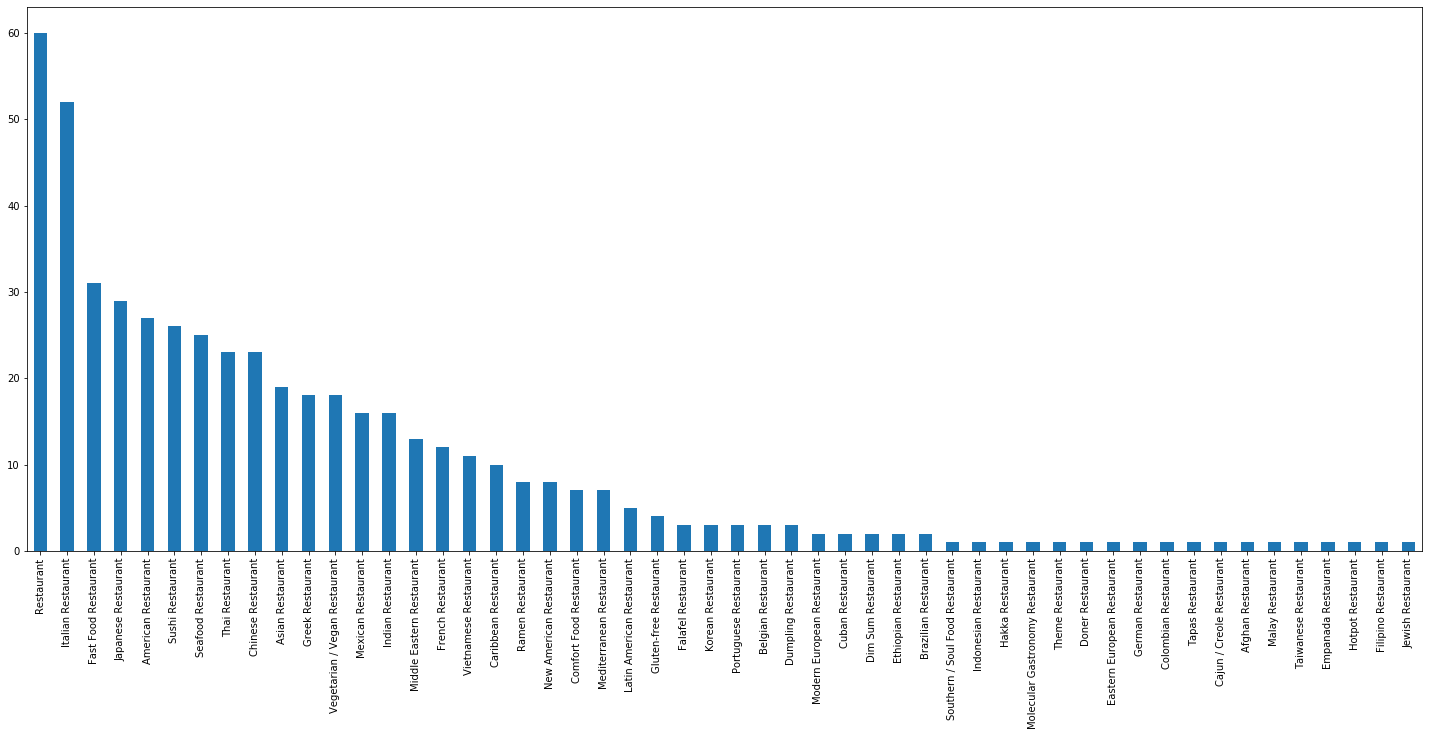

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 10))
pd.value_counts(restaurants['Venue Category']).plot.bar()

## Clustering by density

importing necessary Python modules and loading up the full data set. Latitude and longitude coordinates converted into a two-dimensional numpy array, called coords

In [31]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from geopy.distance import great_circle
#from shapely.geometry import MultiPoint

coords = restaurants.as_matrix(columns=['Venue Latitude', 'Venue Longitude'])

F:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


To search for areas with the maximum density of restaurants I will use the DBSCAN model.
This model has two main parameters: epsilon and min samples.
The epsilon parameter is the max distance between points of cluster (0.1 km in my example). 
The min_samples parameter is the minimum cluster size (everything else gets classified as noise). 
I’ll set min_samples in cluster to 8. Other areas will be classified as noise.
I use the haversine metric and ball tree algorithm to calculate great circle distances between points. Notice my epsilon and coordinates get converted to radians, because scikit-learn’s haversine metric needs radian units.

In [32]:
kms_per_radian = 6371.0088
epsilon = 0.1 / kms_per_radian
db = DBSCAN(eps=epsilon, min_samples=8, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
cluster_labels = db.labels_
num_clusters = len(set(cluster_labels))
#clusters = pd.Series([coords[cluster_labels == n] for n in range(num_clusters)])
clusters = pd.Series([coords[cluster_labels == n] for n in range(num_clusters)])
print('Number of clusters: {}'.format(num_clusters))

Number of clusters: 15


In [33]:
restaurants['Labels']=cluster_labels

In [34]:
restaurants.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Labels
0,"Rouge, Malvern",43.806686,-79.194353,Wendy's,43.807448,-79.199056,Fast Food Restaurant,-1
1,"Guildwood, Morningside, West Hill",43.763573,-79.188711,Big Bite Burrito,43.766299,-79.190720,Mexican Restaurant,-1
2,Woburn,43.770992,-79.216917,Korean Grill House,43.770812,-79.214502,Korean Restaurant,-1
3,Cedarbrae,43.773136,-79.239476,Drupati's Roti & Doubles,43.775222,-79.241678,Caribbean Restaurant,-1
4,Cedarbrae,43.773136,-79.239476,Federick Restaurant,43.774697,-79.241142,Hakka Restaurant,-1


## Visualisation Clusters of restaurants

I must delete outliers from the dataframe.

In [35]:
restaurants = restaurants[restaurants.Labels != -1]
restaurants = restaurants.reset_index(drop=True)
restaurants

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Labels
0,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,New York Fries,43.778298,-79.343267,Fast Food Restaurant,0
1,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,Moxie's Classic Grill,43.777779,-79.343185,American Restaurant,0
2,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,Thai Express,43.777990,-79.344091,Restaurant,0
3,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,Heart Sushi,43.777203,-79.343805,Japanese Restaurant,0
4,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,Bourbon St. Grill,43.778276,-79.343241,Fast Food Restaurant,0
5,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,KFC,43.778272,-79.343317,Fast Food Restaurant,0
6,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,Spring Rolls,43.777351,-79.343977,Asian Restaurant,0
7,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,McDonald's,43.778256,-79.343293,Fast Food Restaurant,0
8,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,Jimmy The Greek,43.778245,-79.343322,Greek Restaurant,0
9,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,Yoi,43.778244,-79.343010,Japanese Restaurant,0


In [36]:
restaurants.shape

(163, 8)

In [37]:
len(clusters)

15

Now I can create the map of restaurnts clusters

In [42]:
# import matplotlib
import matplotlib.cm as cm
import matplotlib.colors as colors
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)
kclusters=len(clusters)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(restaurants['Venue Latitude'], restaurants['Venue Longitude'], restaurants['Venue Category'], restaurants['Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[(cluster-1)],
        fill=True,
        fill_color=rainbow[(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Then, I can define, which Neighborhoods are most popular for restaurants.

In [38]:
# agggregating restaurants by Neighborhood
neighborhood_clusters=restaurants.drop(['Venue','Venue Latitude','Venue Longitude','Venue Category','Labels'], axis=1)
#[['Neighbourhood']].agg(', '.join)
neighborhood_clusters.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude
0,"Fairview, Henry Farm, Oriole",43.778517,-79.346556
1,"Fairview, Henry Farm, Oriole",43.778517,-79.346556
2,"Fairview, Henry Farm, Oriole",43.778517,-79.346556
3,"Fairview, Henry Farm, Oriole",43.778517,-79.346556
4,"Fairview, Henry Farm, Oriole",43.778517,-79.346556


In [39]:
neighborhood_clusters=neighborhood_clusters.drop_duplicates().reset_index(drop=True)

In [43]:
neighborhood_clusters.head(30)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude
0,"Fairview, Henry Farm, Oriole",43.778517,-79.346556
1,"Flemingdon Park, Don Mills South",43.725900,-79.340923
2,Church and Wellesley,43.665860,-79.383160
3,St. James Town,43.651494,-79.375418
4,Berczy Park,43.644771,-79.373306
5,"Adelaide, King, Richmond",43.650571,-79.384568
6,"Design Exchange, Toronto Dominion Centre",43.647177,-79.381576
7,"Commerce Court, Victoria Hotel",43.648198,-79.379817
8,"Harbord, University of Toronto",43.662696,-79.400049
9,"Chinatown, Grange Park, Kensington Market",43.653206,-79.400049


And I can see the best places for restaurants in Toronto on the map

In [44]:
Neighborhoods_map = folium.Map(location=[latitude, longitude], zoom_start=11)
#map of neighborhoods best for restaurants
for lat, lng, label in zip(neighborhood_clusters['Neighborhood Latitude'], neighborhood_clusters['Neighborhood Longitude'], neighborhood_clusters['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=15,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(Neighborhoods_map)  
    
Neighborhoods_map